In [1]:
%cd ..

/home/zarizky/projects/neural-autoregressive-object-co-occurrence


In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [3]:
np.random.seed(3)

G = nx.DiGraph()

color = {1: "gray", 2: "black"}

# Draw annotation for inputs

labels = ["x₁", "x₂", "x₃"]
label_ids = ["a", "b", "c"]

G.add_nodes_from(
    [(i, dict(label=o, shape="plaintext")) for i, o in zip(label_ids, labels)]
)

# Draw input layer
inputs = ["x₁", "x₂", "x₃"]
inputs_ordering = np.array([2, 1, 3])
G.add_nodes_from(
    [(x, dict(label=o, shape="circle")) for x, o in zip(inputs, inputs_ordering)]
)

# Draw first hidden layer
hidden_1 = ["$h_1^{(1)}$", "$h_2^{(1)}$", "$h_3^{(1)}$", "$h_4^{(1)}$"]
hidden_1_orderings = np.random.randint(
    inputs_ordering.min(), len(inputs), size=[len(hidden_1)]
)
G.add_nodes_from(
    [(h1, dict(label=o, shape="circle")) for h1, o in zip(hidden_1, hidden_1_orderings)]
)

# Draw second hidden layer
hidden_2 = ["$h_1^{(2)}$", "$h_2^{(2)}$", "$h_3^{(2)}$", "$h_4^{(2)}$"]
hidden_2_orderings = np.random.randint(
    hidden_1_orderings.min(), len(inputs), size=[len(hidden_2)]
)
G.add_nodes_from(
    [(h2, dict(label=o, shape="circle")) for h2, o in zip(hidden_2, hidden_2_orderings)]
)

# Draw output layer
outputs = ["$p(x_1|x_2)$", "$p(x_2)$", "$p(x_3|x_1,x_2)$"]
output_ids = ["d", "e", "f"]
G.add_nodes_from(
    [(x, dict(label=o, shape="circle")) for x, o in zip(outputs, inputs_ordering)]
)

# Draw annotation for outputs
labels_out = ["p(x₁|x₂)", "p(x₂)", "p(x₃|x₁,x₂)"]
labels_out_ids = ["g", "h", "i"]
G.add_nodes_from(
    [
        (i, dict(label=o, shape="plaintext", rankjustify="min"))
        for i, o in zip(labels_out_ids, labels_out)
    ]
)

G.graph["graph"] = {"rankdir": "LR", "splines": "line"}
G.graph["node"] = {"rankjustify": "min"}

for u, v in zip(label_ids, inputs):
    G.add_edge(u, v, color="None", minlen=1)

for x in G.subgraph(inputs).nodes(data=True):
    for h1 in G.subgraph(hidden_1).nodes(data=True):
        if h1[-1]["label"] >= x[-1]["label"]:
            G.add_edge(x[0], h1[0], color=color[x[-1]["label"]])
        else:
            G.add_edge(x[0], h1[0], color="None")

for h1 in G.subgraph(hidden_1).nodes(data=True):
    for h2 in G.subgraph(hidden_2).nodes(data=True):
        if h2[-1]["label"] >= h1[-1]["label"]:
            G.add_edge(h1[0], h2[0], color=color[h1[-1]["label"]])
        else:
            G.add_edge(h1[0], h2[0], color="None")

for h2 in G.subgraph(hidden_2).nodes(data=True):
    for x in G.subgraph(outputs).nodes(data=True):
        if h2[-1]["label"] < x[-1]["label"]:
            G.add_edge(h2[0], x[0], color=color[h2[-1]["label"]])
        else:
            G.add_edge(h2[0], x[0], color="None")

for u, v in zip(outputs, labels_out_ids):
    G.add_edge(u, v, color="none", minlen=1)

/tmp/ipykernel_142698/448039722.py:8: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edge_color=colors)


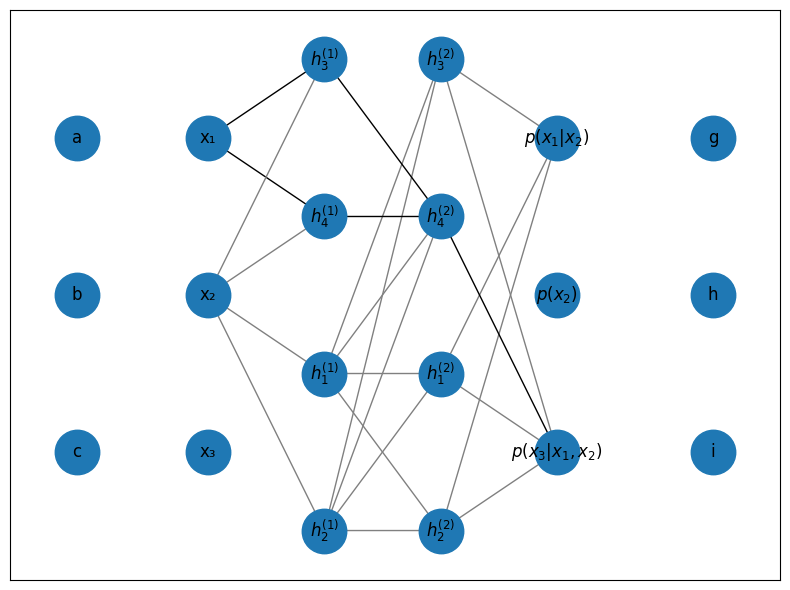

In [4]:
plt.figure(figsize=(8, 6))

edges = G.edges(data=True)
colors = [attr["color"] for u, v, attr in edges]

pos = nx.nx_agraph.graphviz_layout(G, "dot")
nx.draw_networkx_nodes(G, pos, node_size=1024)
nx.draw_networkx_edges(G, pos, edge_color=colors)
nx.draw_networkx_labels(G, pos)

plt.tight_layout()

In [7]:
from IPython.display import Image

pgv = nx.nx_agraph.to_agraph(G)
pgv.graph_attr["dpi"] = 512
pgv.graph_attr['margin'] = '0'
pgv.layout("dot")
pgv.draw("outputs/made-network.pdf")